



# Project: Problem Statement - Personal Loan Campaign Modelling
* Thera Bank Personal Loan Campaign
 
# Data Description:
* The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

# Domain:
* Banking

 

# Context:
* This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

 

## Attribute Information:
* ID: Customer ID
* Age: Customer's age in completed years
* Experience: #years of professional experience
* Income: 'Annual income of the customer 
* ZIP Code: Home Address ZIP
* Family: Family size of the customer
* CCAvg: Avg. spending on credit cards per month 
* Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
* Mortgage: Value of house mortgage if any. 
* Personal Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities Account: Does the customer have a securities account with the bank?
* CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Does the customer use internet banking facilities?
* Credit card: Does the customer use a credit card issued by the bank?



## <a id = "link1"></a> Import Libraries and Load Dataset

In [109]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [111]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [112]:
df.shape

(5000, 14)

- There are a lot of columns with categorical data like Education, Personal Loan, Securities Account, CD Account, Online and Credit Card

## <a id = "link2"></a> Univariate Analysis

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Insights:**
- We know that our dataset has 5000 rows of data.
- By looking at the above output of df.info(), we see that all columns have 5000 non-null values.
    - It means there is no NULL (missing) vakues

In [114]:
#Lets analysze the distribution of the various attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Number of unique values in each column

In [115]:
df.nunique() # Number of unique values in a column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Number of people with zero mortgage

In [116]:
df['Mortgage'][df['Mortgage'] == 0].count()

3462

### Number of people with zero credit card spending per month

In [117]:
df['Mortgage'][df['CCAvg'] == 0].count()

106

### Value counts of all catgorical columns

**Insights:**
- `Family is categorical as it has only 4 unique values`
- `Education is categorical as it has only 3 unique values`

In [118]:
#Convert X & Y variable to a categorical variable wherever relevant
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Personal Loan'] = df['Personal Loan'].astype('category')
df['Securities Account'] = df['Securities Account'].astype('category')
df['CD Account'] = df['CD Account'].astype('category')
df['Online'] = df['Online'].astype('category')
df['CreditCard'] = df['CreditCard'].astype('category')

In [119]:
df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [120]:
for i in list(df.columns[df.dtypes=='category']):   # checking value counts of all category type columns
    print(df[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



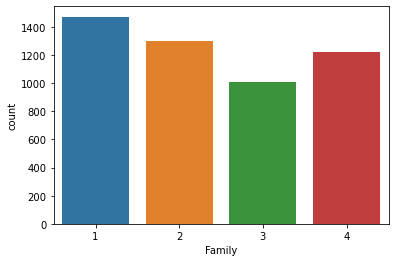

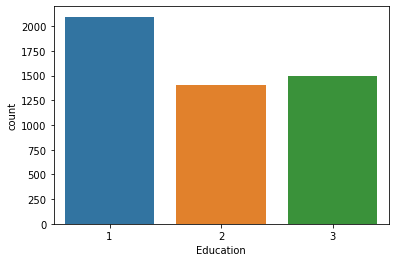

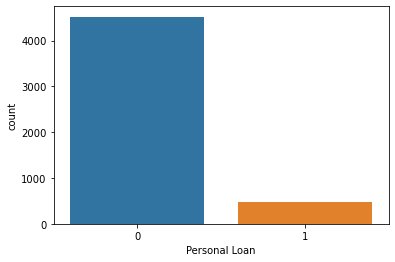

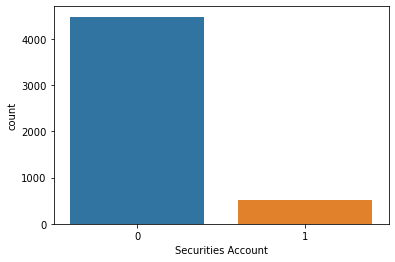

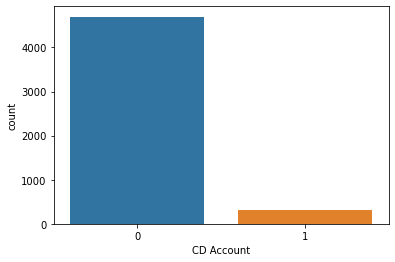

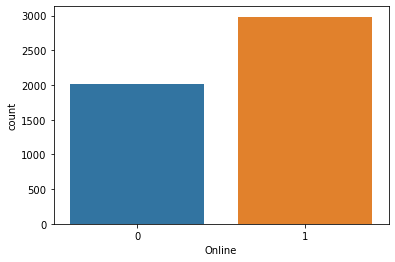

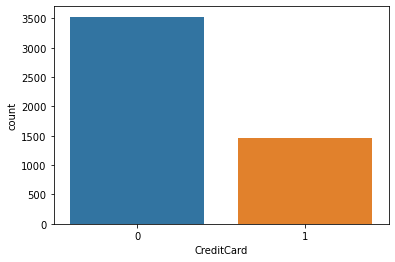

In [121]:
 for i in ['Family','Education','Personal Loan','Securities Account','CD Account','Online', 'CreditCard']:
     sns.countplot(df[i])
     plt.show()

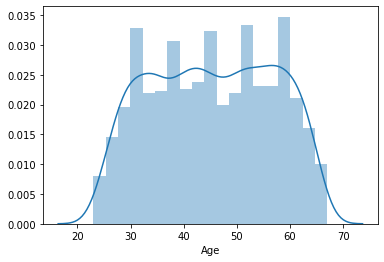

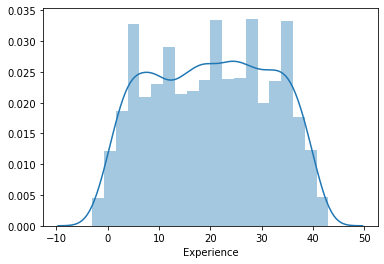

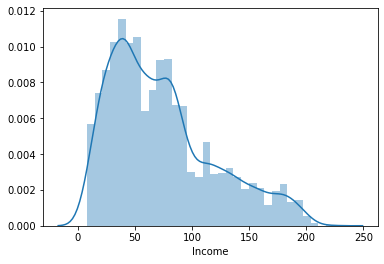

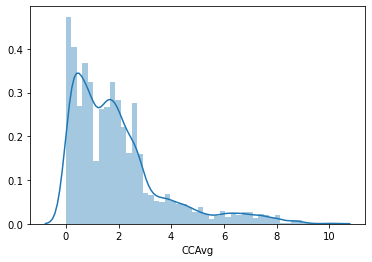

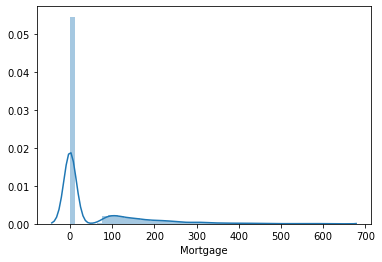

In [122]:
# distplot for continous columns
for i in ['Age','Experience','Income', 'CCAvg', 'Mortgage']:
    sns.distplot(df[i])
    plt.show()

**Insights:**
- We can see that Income, CcAvg and Mortagage are right skewed.

## <a id = "link3"></a> Null Values Treatment

In [123]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Getting rid of unwanted columns

**Insights:**
- `ID column has all unique values and it not a continous column so it has 5000 categories one for each row and that would not provide any info to the algorithm`

In [124]:
cr_df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [125]:
cr_df['ZIP Code'].value_counts(normalize=True)

# value counts gives us how many times does the value 

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64

In [126]:
pd.crosstab(cr_df['ZIP Code'],cr_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
ZIP Code,,
9307,0.000221,0.0
90005,0.001106,0.0
90007,0.001327,0.0
90009,0.001770,0.0
90011,0.000664,0.0
...,...,...
96091,0.000885,0.0
96094,0.000442,0.0
96145,0.000221,0.0


In [127]:
cr_df.drop('ZIP Code', axis =1, inplace=True) # dropping this is too skewed and creating dummies for ZIP Code will not add any value to algorithm
cr_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## <a id = "link4"></a> Bivariate Analysis

In [128]:
# Let us look at the target column which is 'Personal Loan' to understand how the data is distributed amongst the various values
cr_df.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.367257,20.132301,66.237389,1.729009,51.789381
1,45.066667,19.843750,144.745833,3.905354,100.845833


In [129]:
cr_df.groupby(["Personal Loan"]).median()

,Age,Experience,Income,CCAvg,Mortgage
Personal Loan,,,,,
0,45.0,20.0,59.0,1.4,0.0
1,45.0,20.0,142.5,3.8,0.0


**Insights:**
- `No major difference in case of Age, Mortgage and Experience values w.r.t. target variable`

- Customers with higher Income, CCAvg have taken offered loan more

In [130]:
pd.crosstab(cr_df['Education'],cr_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
Education,,
1,0.443142,0.193750
2,0.270133,0.379167
3,0.286726,0.427083


**Insights:**
- Customer with Advanced/Professional Level have taken offered loan relatively more

In [131]:
pd.crosstab(cr_df['Family'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


**Insights:**
- Customer with Family size 3 have taken offered loan relatively more

In [132]:
pd.crosstab(cr_df['Securities Account'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


**Insights:**
- Customer with Securities Account have taken offered loan slightly more but its not conclusive

In [133]:
pd.crosstab(cr_df['CD Account'],cr_df['Personal Loan'],normalize='columns')

Personal Loan,0,1
CD Account,,
0,0.964159,0.708333
1,0.035841,0.291667


**Insights:**
- Customer with no CD Account have taken offered loan relatively more

In [134]:
pd.crosstab(cr_df['Online'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


**Insights:**
- Customer with Internet Banking facilities have taken offered loan slightly more but its not conclusive

In [135]:
pd.crosstab(cr_df['CreditCard'],cr_df['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


**Insights:**
- Customer with Credit Card have taken offered loan slightly more but its not conclusive

In [98]:
## Define X and Y variables

X = cr_df.drop('Personal Loan', axis=1)
Y = cr_df['Personal Loan'].astype('category')     

# change data typr to 'category' because it was object type which is not recognized by model

In [99]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [100]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7)

In [101]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=7,fit_intercept=False)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(fit_intercept=False, random_state=7)

In [102]:
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data

In [103]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9582857142857143

Testing accuracy 0.9633333333333334

Confusion Matrix


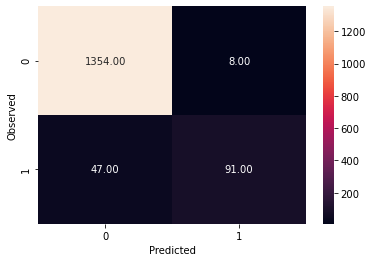

None

Accuracy: 0.9633333333333334

Recall: 0.6594202898550725

Precision: 0.9191919191919192

F1 Score: 0.7679324894514767

Roc Auc Score: 0.826773287365128


In [104]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Accuracy:",accuracy_score(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

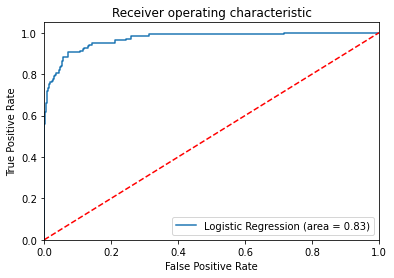

In [105]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [106]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
9,Education_3,3.59
8,Education_2,3.21
11,CD Account_1,2.43
6,Family_3,1.63
7,Family_4,1.52
13,CreditCard_1,0.72
12,Online_1,0.51
0,Age,0.44
1,Experience,0.44
5,Family_2,0.22


### Test Data where Predicted Class is not equal to Observed Class

In [107]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
z['Observed Personal Loan'] = y_test
z['Predicted Personal Loan'] = y_predict
z.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Personal Loan,Predicted Personal Loan
3406,42,12,34,2.0,0,0,1,0,0,1,0,0,0,1,0,0
757,52,28,81,1.8,0,0,1,0,1,0,1,0,0,0,0,0
3624,58,28,70,1.4,0,0,0,0,0,1,0,0,0,0,0,0
4544,28,4,80,2.5,0,0,1,0,0,0,0,0,1,0,0,0
3235,60,35,39,1.6,0,1,0,0,0,1,0,0,1,0,0,0


In [108]:
z[z['Observed Personal Loan'] != z['Predicted Personal Loan']]

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Observed Personal Loan,Predicted Personal Loan
4301,49,24,130,1.10,281,0,0,1,0,0,0,1,1,0,1,0
4575,53,27,115,0.50,0,1,0,0,0,1,0,0,0,0,1,0
3383,46,22,135,4.10,213,0,1,0,0,0,0,0,1,0,1,0
459,35,10,200,3.00,458,1,0,0,0,0,0,0,0,0,0,1
2304,27,2,170,4.70,0,0,1,0,0,0,0,0,1,0,1,0
1731,43,19,125,2.40,0,0,1,0,0,0,0,0,1,0,1,0
1901,43,19,201,6.67,0,1,0,0,0,0,1,0,1,0,0,1
2996,42,18,103,3.33,0,0,0,0,0,0,1,1,1,1,1,0
3983,39,13,93,3.60,0,0,0,1,0,1,0,0,1,0,1,0
1793,35,9,113,0.80,0,0,1,0,0,1,0,0,1,0,1,0


## <a id = "link8"></a>Business Insights 

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that liability customer will offered loan and customer will accept the offered loan.

*False Positive (observed=0,predicted=1):*

Predicted that liability customer will offered loan and customer will not accept the offered loan.

*True Negative (observed=0,predicted=0):*

Predicted that liability customer will not be offered loan and customer will not accept the offered loan.

*False Negative (observed=1,predicted=0):*

Predicted that liability customer will not be offered loan and customer will accept the offered loan.

##### `Important Features`

"Eductaion_3", "Education_2", "CD_Account_1", "Family_3", "Family_4"

seems to be top 5 features which influence the model's output based on the coefficients value and Bank should target these customers.

Mortgage has coefficient value as 0 so these feature doesn't help model in predicting target variable.


##### `Important Metric`

Here the bank wants to target people who would accept the offered loan i.e. **more number of True Positive** and **less number of False Negative**. Hence **Recall is the important metric**.